In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1000)

import time

from models.CNN import Net
from Utils import Utils

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 512

trainset = torchvision.datasets.CIFAR10(root='~/data',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        num_workers=24)

testset = torchvision.datasets.CIFAR10(root='~/data',
                                    train=False,
                                    download=True,
                                    transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                        batch_size=batch_size,
                                        shuffle=False,
                                        num_workers=24)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cnn_exp = Utils(Net)

In [4]:
net = cnn_exp.train(trainloader)

Training the Model...
------------------------------
Epoch: 1/40...	|	Loss: 2.3038	|	Train Accuracy: 8.67%	|	Time per Epoch: 1.66 seconds
Epoch: 2/40...	|	Loss: 2.3026	|	Train Accuracy: 9.20%	|	Time per Epoch: 1.38 seconds
Epoch: 3/40...	|	Loss: 2.3014	|	Train Accuracy: 10.07%	|	Time per Epoch: 1.37 seconds
Epoch: 4/40...	|	Loss: 2.3002	|	Train Accuracy: 10.63%	|	Time per Epoch: 1.37 seconds
Epoch: 5/40...	|	Loss: 2.2988	|	Train Accuracy: 11.43%	|	Time per Epoch: 1.40 seconds
Epoch: 6/40...	|	Loss: 2.2970	|	Train Accuracy: 14.85%	|	Time per Epoch: 1.47 seconds
Epoch: 7/40...	|	Loss: 2.2946	|	Train Accuracy: 18.73%	|	Time per Epoch: 1.64 seconds
Epoch: 8/40...	|	Loss: 2.2909	|	Train Accuracy: 19.61%	|	Time per Epoch: 1.66 seconds
Epoch: 9/40...	|	Loss: 2.2851	|	Train Accuracy: 19.13%	|	Time per Epoch: 1.67 seconds
Epoch: 10/40...	|	Loss: 2.2750	|	Train Accuracy: 19.75%	|	Time per Epoch: 1.48 seconds
Epoch: 11/40...	|	Loss: 2.2568	|	Train Accuracy: 20.43%	|	Time per Epoch: 2.02 seconds
E

In [5]:
cnn_exp.test(testloader)

Testing the Model...
------------------------------
Accuracy for class: plane is 47.1 %
Accuracy for class: car   is 48.6 %
Accuracy for class: bird  is 18.6 %
Accuracy for class: cat   is 31.6 %
Accuracy for class: deer  is 27.3 %
Accuracy for class: dog   is 34.6 %
Accuracy for class: frog  is 63.0 %
Accuracy for class: horse is 60.4 %
Accuracy for class: ship  is 56.0 %
Accuracy for class: truck is 56.8 %


In [6]:
torch.save(net.state_dict(), './pytorch-model.pth')

In [7]:
images, labels = next(iter(testloader))

1. Untargeted attacks

In [8]:
adv_image = cnn_exp.untargeted_attack(images[0].unsqueeze(0), labels[0].unsqueeze(0), 0.031)

In [9]:
cnn_exp.test_untargeted(testloader)

Testing the Model...
------------------------------
Accuracy for class: plane is 64.0 %
Accuracy for class: car   is 1.3 %
Accuracy for class: bird  is 14.1 %
Accuracy for class: cat   is 3.1 %
Accuracy for class: deer  is 64.5 %
Accuracy for class: dog   is 25.9 %
Accuracy for class: frog  is 22.9 %
Accuracy for class: horse is 43.3 %
Accuracy for class: ship  is 13.6 %
Accuracy for class: truck is 4.2 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


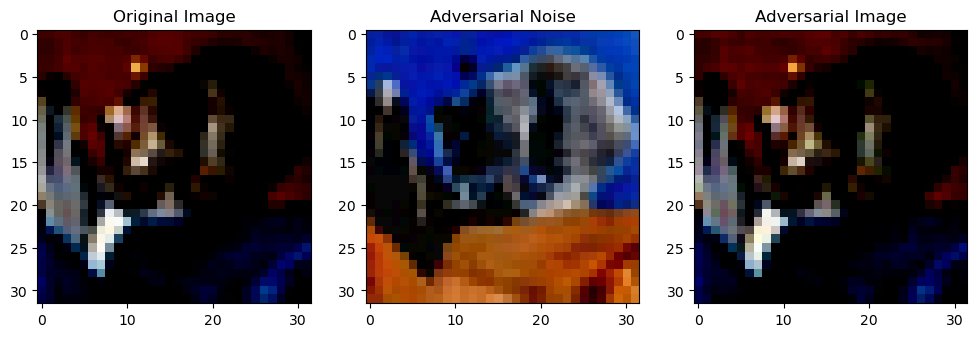

In [10]:
import matplotlib.pyplot as plt

# Convert the adversarial image, original image, and noise tensor to NumPy arrays
adv_image_np = adv_image.squeeze().detach().cpu().numpy()
original_image_np = images[0].squeeze().detach().cpu().numpy()
noise_np = (adv_image_np - original_image_np)

# Create subplots to display original image, noise, and adversarial image side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original_image_np.transpose(1, 2, 0))  # Assuming image is in CHW format
axes[0].set_title('Original Image')

axes[1].imshow(noise_np.transpose(1, 2, 0))  # Assuming noise is in CHW format
axes[1].set_title('Adversarial Noise')

axes[2].imshow(adv_image_np.transpose(1, 2, 0))  # Assuming adversarial image is in CHW format
axes[2].set_title('Adversarial Image')

plt.show()


2. Untargeted attacks

In [11]:
adv_image = cnn_exp.targeted_attack(images[1].unsqueeze(0), 8, 0.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


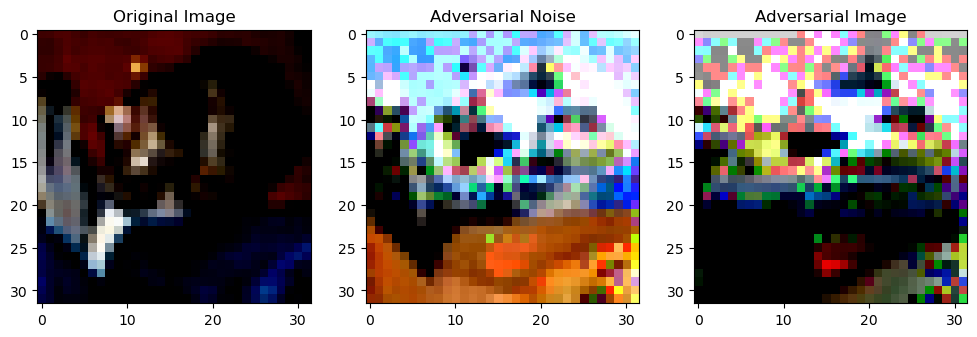

In [12]:
import matplotlib.pyplot as plt

# Convert the adversarial image, original image, and noise tensor to NumPy arrays
adv_image_np = adv_image.squeeze().detach().cpu().numpy()
original_image_np = images[0].squeeze().detach().cpu().numpy()
noise_np = (adv_image_np - original_image_np)

# Create subplots to display original image, noise, and adversarial image side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original_image_np.transpose(1, 2, 0))  # Assuming image is in CHW format
axes[0].set_title('Original Image')

axes[1].imshow(noise_np.transpose(1, 2, 0))  # Assuming noise is in CHW format
axes[1].set_title('Adversarial Noise')

axes[2].imshow(adv_image_np.transpose(1, 2, 0))  # Assuming adversarial image is in CHW format
axes[2].set_title('Adversarial Image')

plt.show()


In [13]:
cnn_exp.test_target(testloader, 3, 0.0001)

Testing the Model...
------------------------------
Accuracy for class: plane is 64.1 %
Accuracy for class: car   is 1.3 %
Accuracy for class: bird  is 14.2 %
Accuracy for class: cat   is 3.1 %
Accuracy for class: deer  is 64.7 %
Accuracy for class: dog   is 26.4 %
Accuracy for class: frog  is 22.9 %
Accuracy for class: horse is 43.4 %
Accuracy for class: ship  is 13.9 %
Accuracy for class: truck is 4.3 %


In [14]:
cnn_exp.test_target(testloader, 7, 0.003)

Testing the Model...
------------------------------
Accuracy for class: plane is 64.3 %
Accuracy for class: car   is 1.3 %
Accuracy for class: bird  is 13.8 %
Accuracy for class: cat   is 3.2 %
Accuracy for class: deer  is 64.5 %
Accuracy for class: dog   is 26.7 %
Accuracy for class: frog  is 23.2 %
Accuracy for class: horse is 43.1 %
Accuracy for class: ship  is 14.1 %
Accuracy for class: truck is 4.4 %


3. Adversarial Training

In [16]:
Adv_train = Utils(Net)
print("Training on the original dataset for 20 epochs")
Adv_train.train(trainloader, 20)
print("Training on the adversarial dataset for 20 epochs")
Adv_train.train_adversarial(trainloader, 0.001,0.5,10)
print("Testing on the original dataset")
Adv_train.test(testloader)

Training on the original dataset for 20 epochs
Training the Model...
------------------------------


Epoch: 1/20...	|	Loss: 2.3036	|	Train Accuracy: 9.16%	|	Time per Epoch: 1.41 seconds
Epoch: 2/20...	|	Loss: 2.3011	|	Train Accuracy: 9.75%	|	Time per Epoch: 1.35 seconds
Epoch: 3/20...	|	Loss: 2.2980	|	Train Accuracy: 10.26%	|	Time per Epoch: 1.44 seconds
Epoch: 4/20...	|	Loss: 2.2935	|	Train Accuracy: 10.80%	|	Time per Epoch: 1.37 seconds
Epoch: 5/20...	|	Loss: 2.2854	|	Train Accuracy: 11.82%	|	Time per Epoch: 1.39 seconds
Epoch: 6/20...	|	Loss: 2.2672	|	Train Accuracy: 15.91%	|	Time per Epoch: 1.42 seconds
Epoch: 7/20...	|	Loss: 2.2358	|	Train Accuracy: 18.94%	|	Time per Epoch: 1.36 seconds
Epoch: 8/20...	|	Loss: 2.2025	|	Train Accuracy: 22.05%	|	Time per Epoch: 1.37 seconds
Epoch: 9/20...	|	Loss: 2.1641	|	Train Accuracy: 23.54%	|	Time per Epoch: 1.40 seconds
Epoch: 10/20...	|	Loss: 2.1205	|	Train Accuracy: 23.40%	|	Time per Epoch: 1.37 seconds
Epoch: 11/20...	|	Loss: 2.0828	|	Train Accuracy: 24.39%	|	Time per Epoch: 1.36 seconds
Epoch: 12/20...	|	Loss: 2.0506	|	Train Accuracy: 25.68